In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/kaggle/input/human-resources-data-set/HRDataset_v14.csv


# Load the dataset

In [13]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/human-resources-data-set/HRDataset_v14.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())


              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

# 1. Load the required libraries and check the data types in the dataset. Convert columns to numeric where necessary.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data types of the columns
print("\nColumn data types:")
print(df.dtypes)

# Convert 'PerformanceScore' column to numerical values if it contains strings
if df['PerformanceScore'].dtype == 'object':
    print("\nThe 'PerformanceScore' column contains text values. Converting to numeric.")
    performance_mapping = {
        'Exceeds': 4,
        'Fully Meets': 3,
        'Needs Improvement': 2,
        'PIP': 1
    }
    df['PerformanceScore'] = df['PerformanceScore'].map(performance_mapping)

# Convert 'Absences' column to numeric if necessary
if df['Absences'].dtype == 'object':
    print("\nThe 'Absences' column contains text values. Converting to numeric.")
    df['Absences'] = pd.to_numeric(df['Absences'], errors='coerce')

# Drop rows with missing values in 'PerformanceScore' or 'Absences'
df = df.dropna(subset=['PerformanceScore', 'Absences'])

# Verify the data after corrections
print("\nPreview of corrected data:")
print(df.head())



Column data types:
Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                    

   # 2.Perform descriptive statistics and calculate additional metrics for selected columns.


Descriptive statistics for relevant columns:
       PerformanceScore    Absences
count        311.000000  311.000000
mean           2.977492   10.237942
std            0.587072    5.852596
min            1.000000    1.000000
25%            3.000000    5.000000
50%            3.000000   10.000000
75%            3.000000   15.000000
max            4.000000   20.000000

Statistics for PerformanceScore:
- Mean: 2.98
- Median: 3.00
- Mode: 3
- Variance: 0.34
- Standard Deviation: 0.59

Statistics for Absences:
- Mean: 10.24
- Median: 10.00
- Mode: 4
- Variance: 34.25
- Standard Deviation: 5.85


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


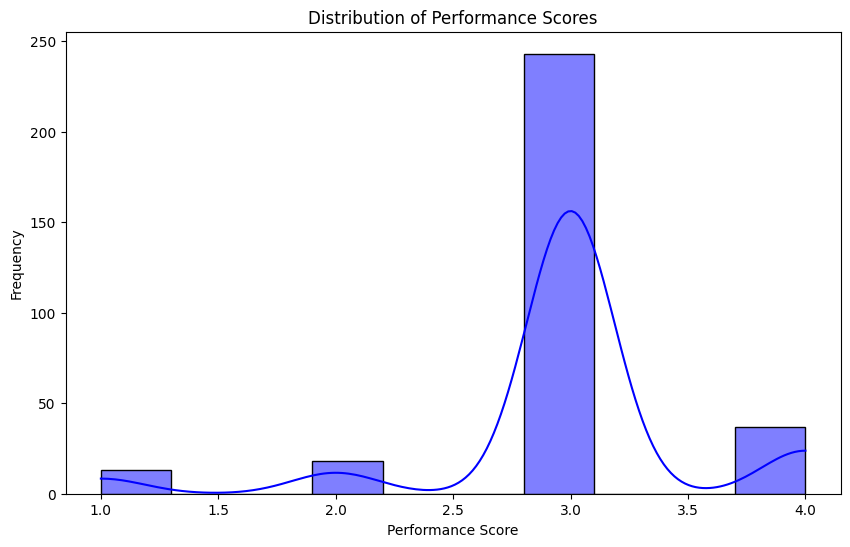

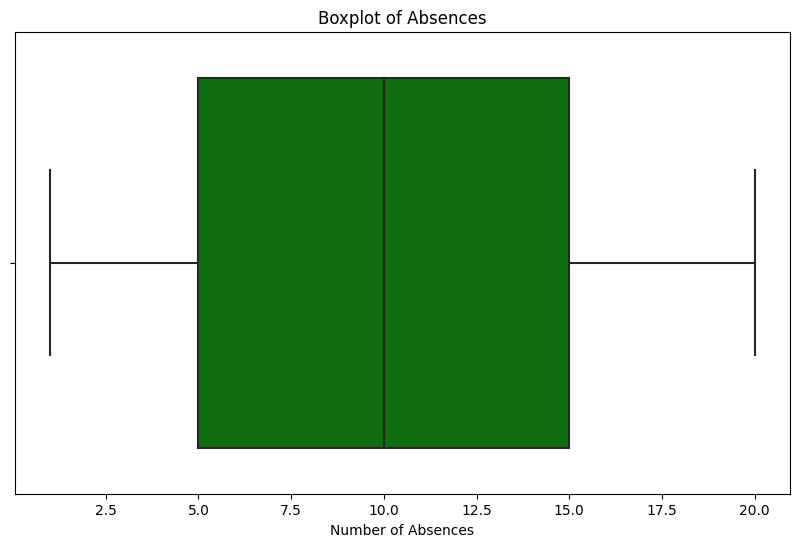

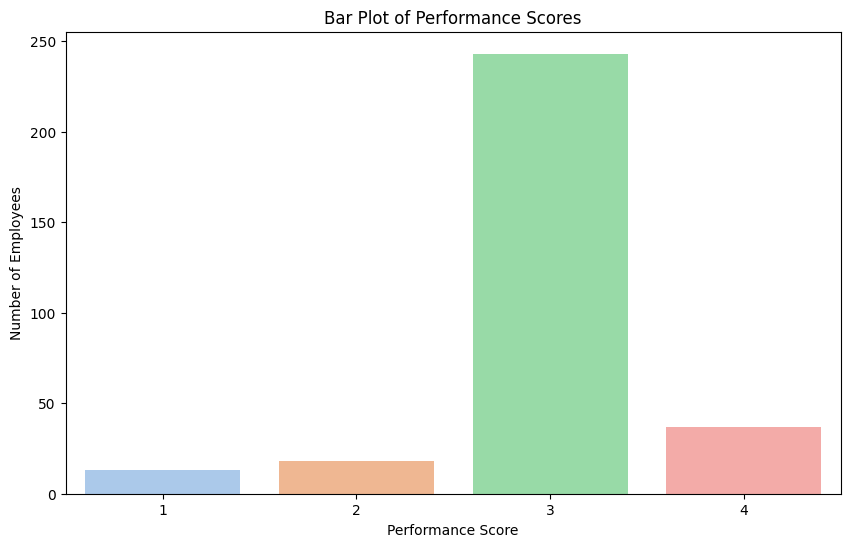

In [15]:
# Step 4: Descriptive statistics

print("\nDescriptive statistics for relevant columns:")
cols_of_interest = ['PerformanceScore', 'Absences']
print(df[cols_of_interest].describe())

# Additional statistics for 'PerformanceScore' and 'Absences'
for col in cols_of_interest:
    print(f"\nStatistics for {col}:")
    print(f"- Mean: {df[col].mean():.2f}")
    print(f"- Median: {df[col].median():.2f}")
    print(f"- Mode: {df[col].mode()[0]}")
    print(f"- Variance: {df[col].var():.2f}")
    print(f"- Standard Deviation: {df[col].std():.2f}")

# Step 5: Visualization of distributions
# Distribution of performance scores
plt.figure(figsize=(10, 6))
sns.histplot(df['PerformanceScore'], kde=True, bins=10, color='blue')
plt.title("Distribution of Performance Scores")
plt.xlabel("Performance Score")
plt.ylabel("Frequency")
plt.show()

# Boxplot for absences
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Absences'], color='green')
plt.title("Boxplot of Absences")
plt.xlabel("Number of Absences")
plt.show()

# Bar plot for performance scores
plt.figure(figsize=(10, 6))
sns.countplot(x='PerformanceScore', data=df, palette='pastel')
plt.title("Bar Plot of Performance Scores")
plt.xlabel("Performance Score")
plt.ylabel("Number of Employees")
plt.show()


# 3.Visualize distributions and analyze outliers in the dataset for performance scores and absences.


Outlier Analysis:

Outliers detected for PerformanceScore:
           Employee_Name         Department     ManagerName  PerformanceScore
0    Adinolfi, Wilson  K  Production         Michael Albert                 4
5      Anderson, Linda    Production               Amy Dunn                 4
12      Barbossa, Hector              IT/IS      Simon Roup                 4
16      Beak, Kimberly    Production          Kelley Spirea                 4
22         Billis, Helen  Production         Brannon Miller                 4
..                   ...                ...             ...               ...
293        Volk, Colleen  Production          Kelley Spirea                 4
297     Wallace, Theresa  Production           Elijiah Gray                 2
304   Winthrop, Jordan    Production         Brannon Miller                 4
307   Ybarra, Catherine   Production         Brannon Miller                 1
308     Zamora, Jennifer              IT/IS      Janet King                 4

[68

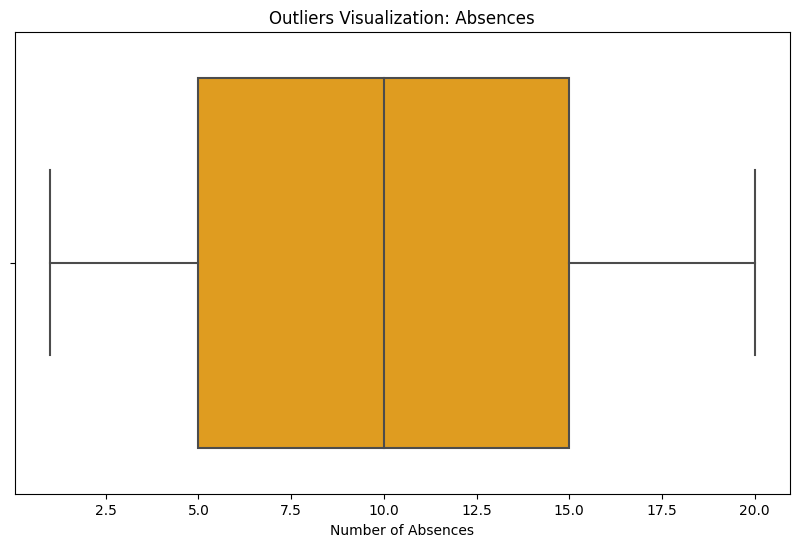

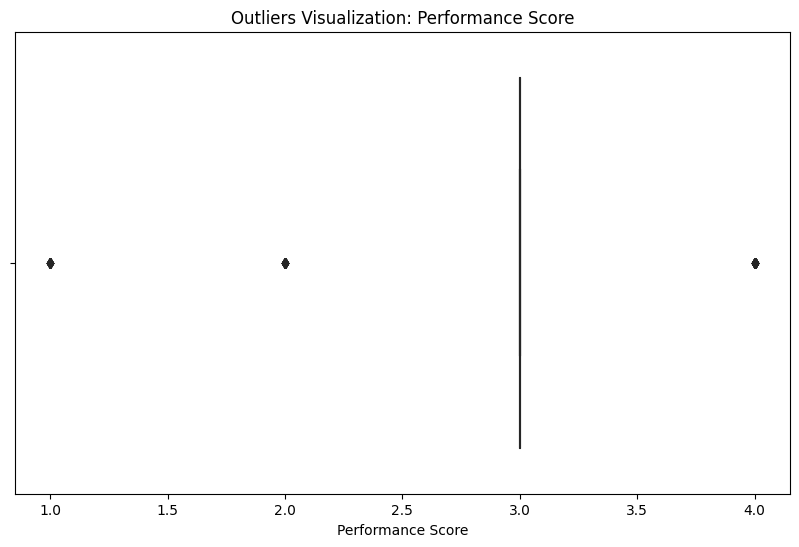


Correlation between Absences and Performance Scores:
The correlation coefficient is: 0.04


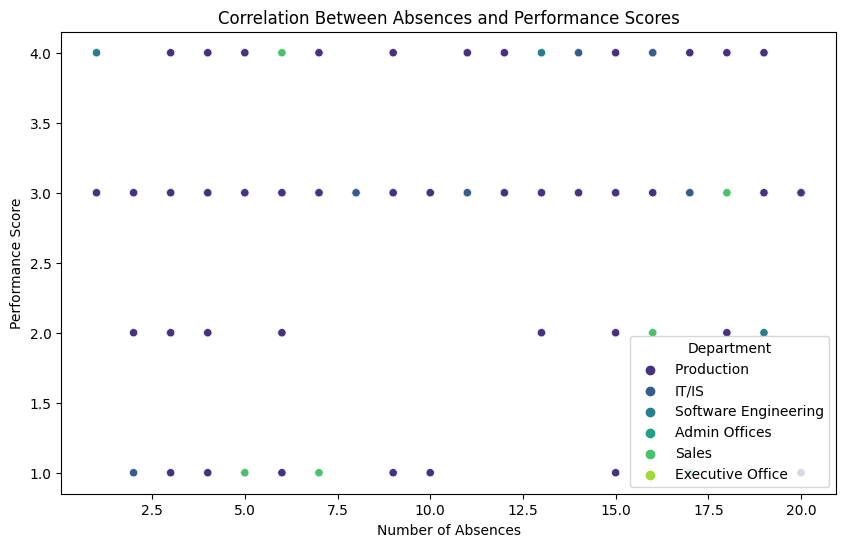

In [16]:
# Step 6: Detection and analysis of outliers (1.5 * IQR rule)
print("\nOutlier Analysis:")
for col in cols_of_interest:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers detected for {col}:")
    print(outliers[['Employee_Name', 'Department', 'ManagerName', col]])

# Visualize outliers for absences
plt.figure(figsize=(10, 6))
sns.boxplot(x='Absences', data=df, color='orange')
plt.title("Outliers Visualization: Absences")
plt.xlabel("Number of Absences")
plt.show()

# Visualize outliers for performance scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceScore', data=df, color='purple')
plt.title("Outliers Visualization: Performance Score")
plt.xlabel("Performance Score")
plt.show()

# Step 7: Explore correlation between absences and performance scores
print("\nCorrelation between Absences and Performance Scores:")
correlation = df['Absences'].corr(df['PerformanceScore'])
print(f"The correlation coefficient is: {correlation:.2f}")

# Visualize the relationship between absences and performance scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Absences', y='PerformanceScore', data=df, hue='Department', palette='viridis')
plt.title("Correlation Between Absences and Performance Scores")
plt.xlabel("Number of Absences")
plt.ylabel("Performance Score")
plt.show()


# 4.Identify the best and worst performing departments and managers, and analyze their average performance scores.


Performance by department:
Department
Software Engineering    3.090909
IT/IS                   3.060000
Admin Offices           3.000000
Executive Office        3.000000
Production              2.980861
Sales                   2.774194
Name: PerformanceScore, dtype: float64


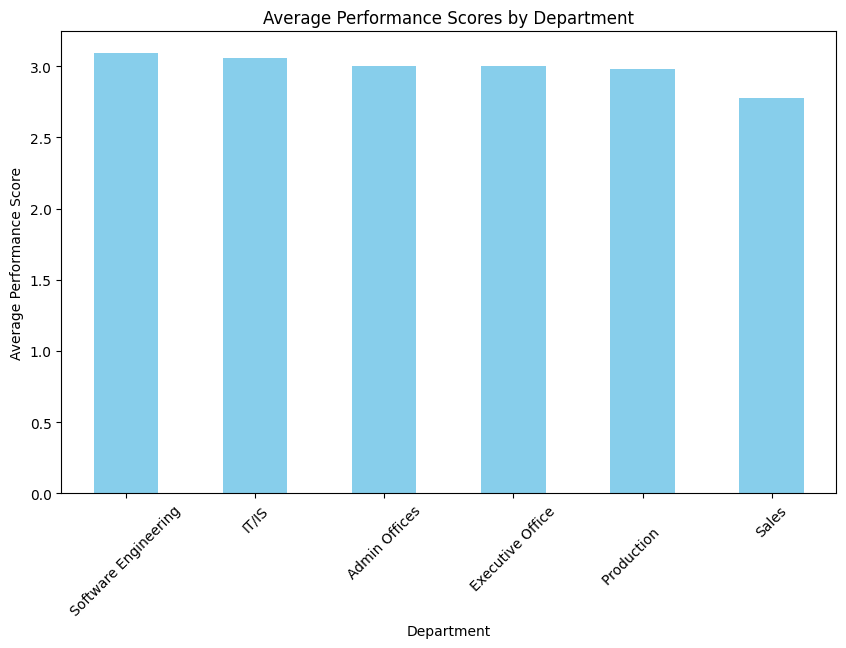


Performance by manager:
ManagerName
Eric Dougall          3.250000
Jennifer Zamora       3.142857
Simon Roup            3.117647
Alex Sweetwater       3.111111
Janet King            3.105263
Kelley Spirea         3.090909
Ketsia Liebig         3.047619
Brian Champaigne      3.000000
David Stanley         3.000000
Elijiah Gray          3.000000
Brandon R. LeBlanc    3.000000
Board of Directors    3.000000
Webster Butler        3.000000
Kissy Sullivan        2.954545
Brannon Miller        2.909091
Amy Dunn              2.904762
Michael Albert        2.863636
Peter Monroe          2.857143
Lynn Daneault         2.846154
John Smith            2.714286
Debra Houlihan        2.666667
Name: PerformanceScore, dtype: float64


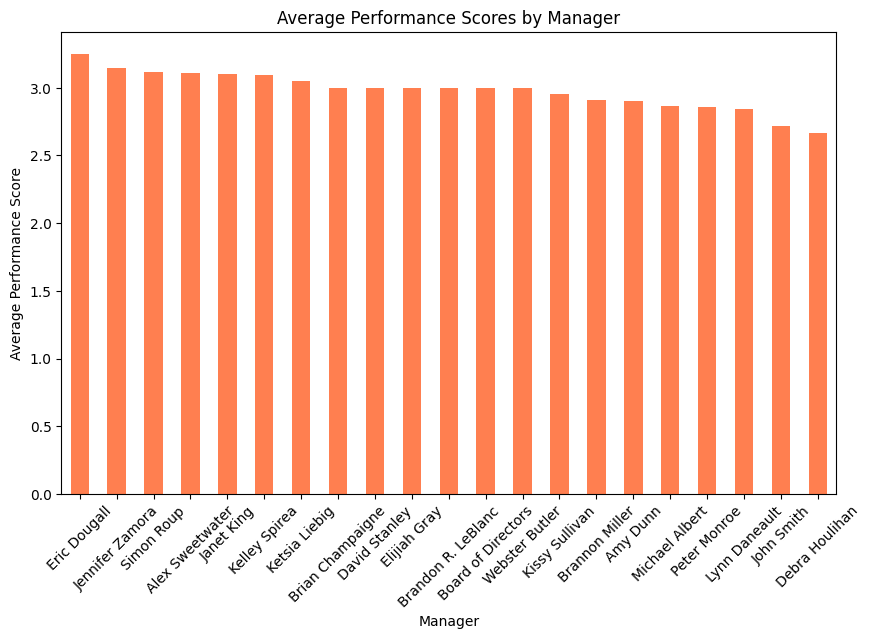


The department with the best performance is: Software Engineering
The department with the worst performance is: Sales
The manager with the best performance is: Eric Dougall
The manager with the worst performance is: Debra Houlihan


In [17]:
# Step 8: Identify departments or managers with exceptional performance
print("\nPerformance by department:")
dept_perf = df.groupby('Department')['PerformanceScore'].mean().sort_values(ascending=False)
print(dept_perf)

plt.figure(figsize=(10, 6))
dept_perf.plot(kind='bar', color='skyblue')
plt.title("Average Performance Scores by Department")
plt.ylabel("Average Performance Score")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

print("\nPerformance by manager:")
manager_perf = df.groupby('ManagerName')['PerformanceScore'].mean().sort_values(ascending=False)
print(manager_perf)

plt.figure(figsize=(10, 6))
manager_perf.plot(kind='bar', color='coral')
plt.title("Average Performance Scores by Manager")
plt.ylabel("Average Performance Score")
plt.xlabel("Manager")
plt.xticks(rotation=45)
plt.show()

# Analysis of the best and worst departments and managers
best_department = dept_perf.idxmax()
worst_department = dept_perf.idxmin()
best_manager = manager_perf.idxmax()
worst_manager = manager_perf.idxmin()

print(f"\nThe department with the best performance is: {best_department}")
print(f"The department with the worst performance is: {worst_department}")
print(f"The manager with the best performance is: {best_manager}")
print(f"The manager with the worst performance is: {worst_manager}")
